## 피마 인디언 당뇨병 예측

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:/Workspace/MachineLearning/01. Introduction/pima-indians-diabetes.csv', header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

### 모델 정의/설정/학습/평가
- 24/12/6/1 layer, 200 epochs

In [5]:
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
del model

In [7]:
model = Sequential([
    Dense(24, input_dim=8, activation='relu'),   # Hidden layer 1
    Dense(12, activation='relu'),                # Hidden layer 2
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 24)                216       
_________________________________________________________________
dense_1 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 78        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', metrics = ['accuracy']
)

In [9]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200, batch_size=50, verbose=1)

l_accuracy: 0.6466
Epoch 61/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5330 - accuracy: 0.7326 - val_loss: 0.6054 - val_accuracy: 0.6638
Epoch 62/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5384 - accuracy: 0.7304 - val_loss: 0.6686 - val_accuracy: 0.6466
Epoch 63/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5305 - accuracy: 0.7457 - val_loss: 0.6117 - val_accuracy: 0.6379
Epoch 64/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5190 - accuracy: 0.7413 - val_loss: 0.5919 - val_accuracy: 0.6466
Epoch 65/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7478 - val_loss: 0.6004 - val_accuracy: 0.6983
Epoch 66/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7326 - val_loss: 0.6082 - val_accuracy: 0.6552
Epoch 67/200
10/10 [==============================] - 0s 2ms/step - loss: 0.5360 - accuracy: 0.7348 - val_loss: 0.6539 - val_accu

In [10]:
acc = model.evaluate(X_test, y_test)
print(f'정확도:{acc[1]:.4f}')

6/6 [==============================] - 0s 1ms/step - loss: 0.5078 - accuracy: 0.7708
정확도:0.7708


- 30/1 layer, rmsprop, 100 epochs

In [24]:
model2 = Sequential()
model2.add(Dense(30, input_shape=(8,), activation='relu'))
model2.add(Dense(1,activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                270       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [25]:
model2.compile(
    loss = 'binary_crossentropy',
    optimizer = 'rmsprop', metrics = ['accuracy']
)

In [26]:
history2 = model2.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100, batch_size=50, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 12ms/step - loss: 0.6947 - accuracy: 0.5109 - val_loss: 0.6835 - val_accuracy: 0.6293
Epoch 2/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6753 - accuracy: 0.6565 - val_loss: 0.6819 - val_accuracy: 0.5862
Epoch 3/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6653 - accuracy: 0.6630 - val_loss: 0.6816 - val_accuracy: 0.5862
Epoch 4/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6565 - accuracy: 0.6674 - val_loss: 0.6823 - val_accuracy: 0.5862
Epoch 5/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6511 - accuracy: 0.6674 - val_loss: 0.6821 - val_accuracy: 0.5862
Epoch 6/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6482 - accuracy: 0.6674 - val_loss: 0.6806 - val_accuracy: 0.5862
Epoch 7/100
10/10 [==============================] - 0s 2ms/step - loss: 0.6463 - accuracy: 0.6674 - val_loss: 0.6814 - val_accuracy: 0.5862
Epoch 8/100


In [28]:
acc2 = model2.evaluate(X_test, y_test)
print(f'모델2 정확도:{acc2[1]:.4f}')

6/6 [==============================] - 0s 1ms/step - loss: 0.5069 - accuracy: 0.7708
모델2 정확도:0.7708


- 24/12/8/1 layers, 200 epochs

In [15]:
model3 = Sequential()
model3.add(Dense(24, input_shape=(8,), activation='relu'))
model3.add(Dense(12, activation='relu'))
model3.add(Dense(8, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                216       
_________________________________________________________________
dense_7 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 9         
Total params: 629
Trainable params: 629
Non-trainable params: 0
_________________________________________________________________


In [16]:
model3.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', metrics = ['accuracy']
)

In [17]:
history = model3.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100, batch_size=50, verbose=2)

Epoch 1/100
10/10 - 0s - loss: 11.9516 - accuracy: 0.6674 - val_loss: 11.3827 - val_accuracy: 0.5862
Epoch 2/100
10/10 - 0s - loss: 7.8230 - accuracy: 0.6674 - val_loss: 7.8062 - val_accuracy: 0.5862
Epoch 3/100
10/10 - 0s - loss: 5.3342 - accuracy: 0.6674 - val_loss: 4.8209 - val_accuracy: 0.5862
Epoch 4/100
10/10 - 0s - loss: 3.1453 - accuracy: 0.6674 - val_loss: 2.6132 - val_accuracy: 0.5862
Epoch 5/100
10/10 - 0s - loss: 1.6963 - accuracy: 0.6674 - val_loss: 1.3861 - val_accuracy: 0.5862
Epoch 6/100
10/10 - 0s - loss: 1.0006 - accuracy: 0.6674 - val_loss: 0.9053 - val_accuracy: 0.5862
Epoch 7/100
10/10 - 0s - loss: 0.7262 - accuracy: 0.6674 - val_loss: 0.7396 - val_accuracy: 0.5862
Epoch 8/100
10/10 - 0s - loss: 0.6730 - accuracy: 0.6674 - val_loss: 0.7350 - val_accuracy: 0.5862
Epoch 9/100
10/10 - 0s - loss: 0.6700 - accuracy: 0.6674 - val_loss: 0.7353 - val_accuracy: 0.5862
Epoch 10/100
10/10 - 0s - loss: 0.6692 - accuracy: 0.6674 - val_loss: 0.7368 - val_accuracy: 0.5862
Epoch 1

In [18]:
acc3 = model3.evaluate(X_test, y_test)
print(f'모델3 정확도:{acc3[1]:.4f}')

6/6 [==============================] - 0s 834us/step - loss: 0.5961 - accuracy: 0.7031
모델3 정확도:0.7031


### MinMaxScaling

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:-1].values)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, df.iloc[:,-1].values, stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [17]:
model4 = Sequential()
model4.add(Dense(12, input_shape=(8,), activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))
model4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [18]:
model4.compile(
    loss = 'binary_crossentropy',
    optimizer = 'adam', metrics = ['accuracy']
)

In [19]:
history4 = model4.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=200, batch_size=50, verbose=2)

0.6379
Epoch 2/200
10/10 - 0s - loss: 0.6830 - accuracy: 0.6783 - val_loss: 0.6842 - val_accuracy: 0.5862
Epoch 3/200
10/10 - 0s - loss: 0.6745 - accuracy: 0.6674 - val_loss: 0.6794 - val_accuracy: 0.5862
Epoch 4/200
10/10 - 0s - loss: 0.6661 - accuracy: 0.6674 - val_loss: 0.6768 - val_accuracy: 0.5862
Epoch 5/200
10/10 - 0s - loss: 0.6571 - accuracy: 0.6674 - val_loss: 0.6760 - val_accuracy: 0.5862
Epoch 6/200
10/10 - 0s - loss: 0.6526 - accuracy: 0.6674 - val_loss: 0.6766 - val_accuracy: 0.5862
Epoch 7/200
10/10 - 0s - loss: 0.6485 - accuracy: 0.6674 - val_loss: 0.6767 - val_accuracy: 0.5862
Epoch 8/200
10/10 - 0s - loss: 0.6465 - accuracy: 0.6674 - val_loss: 0.6778 - val_accuracy: 0.5862
Epoch 9/200
10/10 - 0s - loss: 0.6433 - accuracy: 0.6674 - val_loss: 0.6769 - val_accuracy: 0.5862
Epoch 10/200
10/10 - 0s - loss: 0.6410 - accuracy: 0.6674 - val_loss: 0.6757 - val_accuracy: 0.5862
Epoch 11/200
10/10 - 0s - loss: 0.6390 - accuracy: 0.6674 - val_loss: 0.6770 - val_accuracy: 0.5862
E

In [20]:
acc4 = model4.evaluate(X_test, y_test)
print(f'모델4 정확도:{acc4[1]:.4f}')

6/6 [==============================] - 0s 1ms/step - loss: 0.4579 - accuracy: 0.7865
모델4 정확도:0.7865


### 시각화

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
y_acc = history4.history['accuracy']
y_vloss = history4.history['val_loss']
x_len = np.arange(len(y_acc))

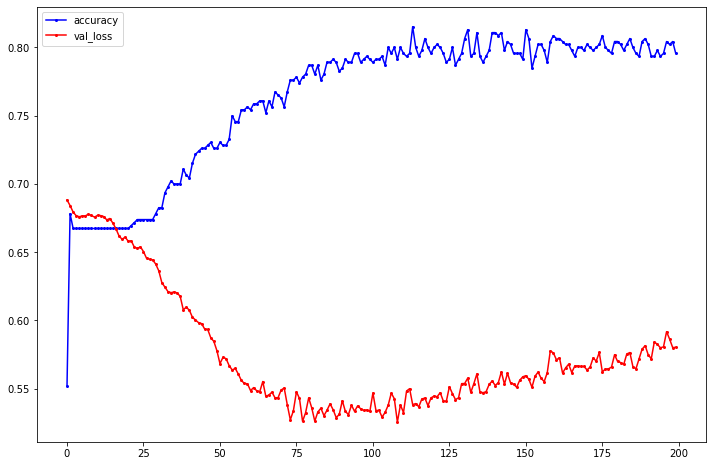

In [23]:
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()